In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
# 使用Savitzky-Golay滤波器替代滑动平均
from scipy.signal import savgol_filter
import seaborn as sns

In [2]:
# 读取CSV文件（无表头）
df = pd.read_csv('/home/yokay/gitpool/10-1pwmd.csv', header=None)

# 提取数据列（假设格式为：时间1, 通道1, 时间2, 通道2）
time1 = df[0].astype(float)  # 第一列时间（秒）
time2 = df[2].astype(float)  # 第三列时间（秒）
channel1 = df[1].astype(float)  # 第二列通道0.5波形
channel2 = df[3].astype(float)  # 第四列通道2波形

In [3]:
# # 读取CSV文件（无表头）
# df = pd.read_csv('/home/yokay/gitpool/2-0.5Tx.csv', header=None)

# # 提取数据列（假设格式为：时间0.5, 通道0.5, 时间2, 通道2）
# time0.5 = df[9].astype(float)  # 第一列时间（秒）
# channel1 = df[10].astype(float)  # 第二列通道1波形
# time2 = df[21].astype(float)  # 第二列时间（秒）
# channel2 = df[22].astype(float)  # 第四列通道2波形

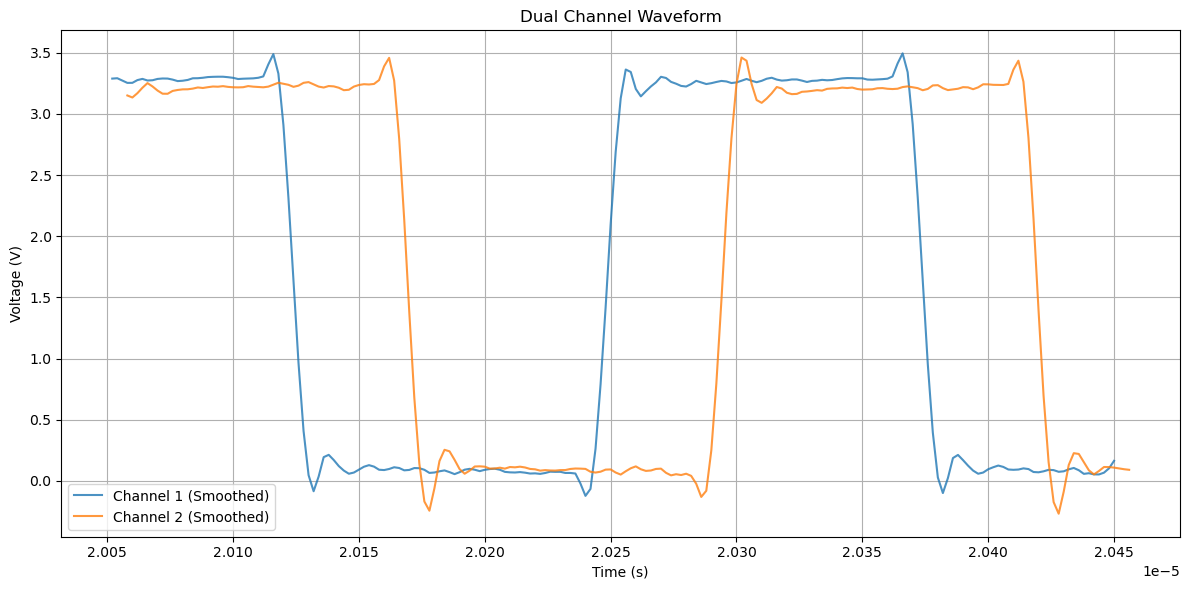

In [4]:
# 创建画布和坐标轴
plt.figure(figsize=(12, 6))


window_size = 11  # 必须为奇数
smooth_ch1 = savgol_filter(channel1, window_size, 3)  # 三次多项式
smooth_ch2 = savgol_filter(channel2, window_size, 3)

# 由于Savitzky-Golay保持数组长度不变，直接使用原时间序列
smooth_time1 = time1[:]
smooth_time2 = time2[:]

# 绘制时应保持维度一致（保持不变）
plt.plot(smooth_time1[-200:], smooth_ch1[-200:], label='Channel 1 (Smoothed)', alpha=0.8)
plt.plot(smooth_time2[-200:], smooth_ch2[-200:], label='Channel 2 (Smoothed)', alpha=0.8)
#plt.plot(smooth_time1[-200:], channel1[-200:], label='Channel 1 (Raw)', alpha=0.3)

# 添加图形元素
plt.title('Dual Channel Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')  # 修改单位
plt.grid(True)
plt.legend()

# 显示图形
plt.tight_layout()
plt.show()

Delta for RISE at 0.0000197488: 45.6ns
Delta for RISE at 0.0000199988: 45.7ns
Delta for RISE at 0.0000202488: 45.7ns
Delta for RISE at 0.0000198738: 45.5ns
Delta for RISE at 0.0000201239: 45.4ns


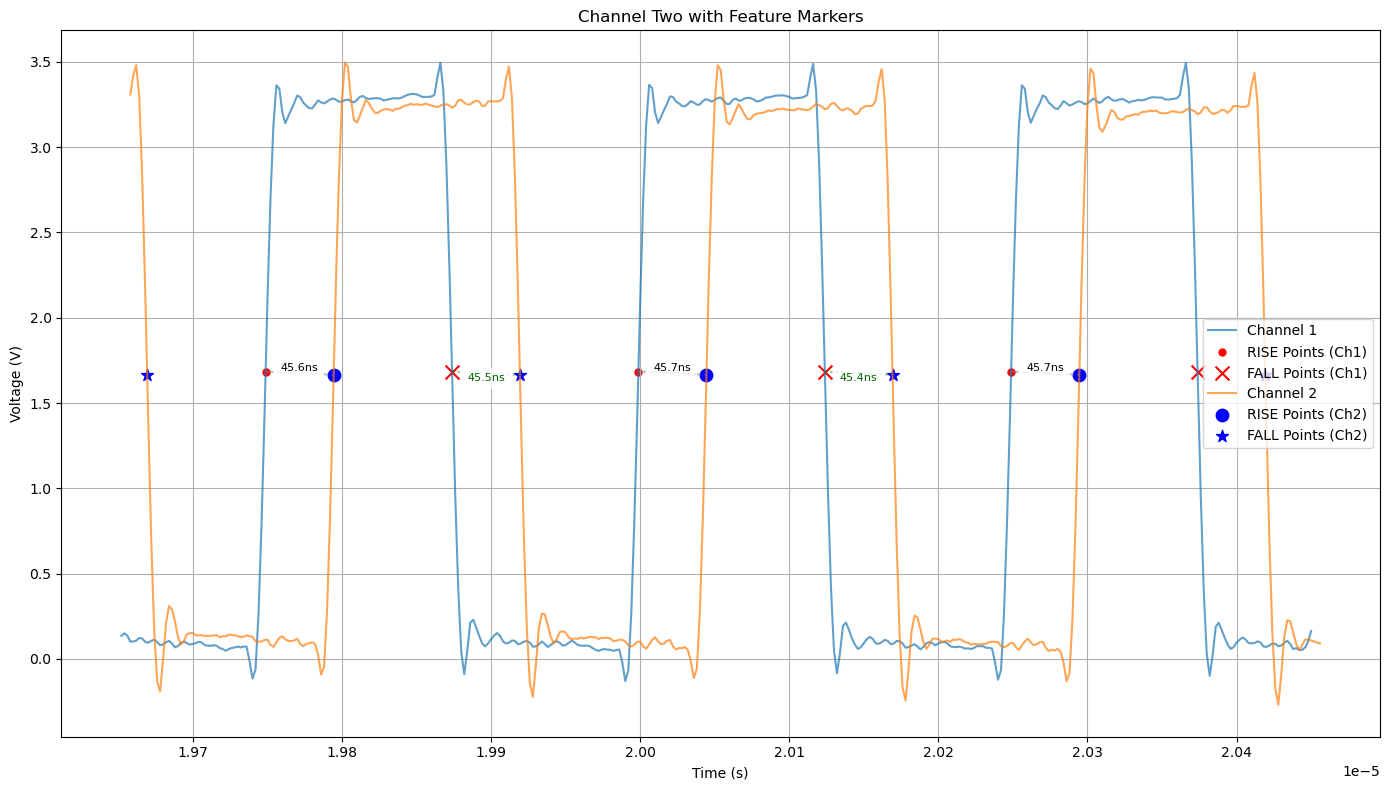

Channel 1 cross at times: [-0.0000205001, -0.0000202503, -0.0000200003, -0.0000197504, -0.0000195003, -0.0000192504, -0.0000190004, -0.0000187505, -0.0000185004, -0.0000182505, -0.0000180005, -0.0000177505, -0.0000175004, -0.0000172505, -0.0000170005, -0.0000167506, -0.0000165005, -0.0000162506, -0.0000160006, -0.0000157506, -0.0000155006, -0.0000152506, -0.0000150006, -0.0000147506, -0.0000145006, -0.0000142506, -0.0000140005, -0.0000137506, -0.0000135005, -0.0000132506, -0.0000130005, -0.0000127505, -0.0000125005, -0.0000122505, -0.0000120006, -0.0000117506, -0.0000115006, -0.0000112506, -0.0000110006, -0.0000107506, -0.0000105006, -0.0000102506, -0.0000100007, -0.0000097507, -0.0000095007, -0.0000092507, -0.0000090007, -0.0000087507, -0.0000085007, -0.0000082507, -0.0000080007, -0.0000077507, -0.0000075007, -0.0000072508, -0.0000070007, -0.0000067507, -0.0000065007, -0.0000062507, -0.0000060007, -0.0000057507, -0.0000055007, -0.0000052507, -0.0000050007, -0.0000047507, -0.0000045007

In [34]:
sel_datalen = 400
# 上升沿中点检测（线性插值）
ch1_mean = np.mean(smooth_ch1)
# 寻找所有候选边沿索引
cross_RISE_points1 = np.where((smooth_ch1[:-1] < ch1_mean) & (smooth_ch1[1:] >= ch1_mean))[0]
# 线性插值计算精确时间
ch1_cross_RISE_times = [smooth_time1[i] + (ch1_mean - smooth_ch1[i]) * 
                  (smooth_time1[i+1] - smooth_time1[i]) / 
                  (smooth_ch1[i+1] - smooth_ch1[i]) for i in cross_RISE_points1]

cross_FALL_points1 = np.where((smooth_ch1[:-1] > ch1_mean) & (smooth_ch1[1:] <= ch1_mean))[0]
# 线性插值计算精确时间
ch1_cross_FALL_times = [smooth_time1[i] + (ch1_mean - smooth_ch1[i]) * 
                  (smooth_time1[i+1] - smooth_time1[i]) / 
                  (smooth_ch1[i+1] - smooth_ch1[i]) for i in cross_FALL_points1]

# 通道2下降沿检测（同理）
ch2_mean = np.mean(smooth_ch2)
# 寻找候选边沿索引（反向条件）
cross_RISE_points2 = np.where((smooth_ch2[:-1] < ch2_mean) & (smooth_ch2[1:] >= ch2_mean))[0]
ch2_cross_RISE_times = [smooth_time2[i] + (ch2_mean - smooth_ch2[i]) * 
                  (smooth_time2[i+1] - smooth_time2[i]) / 
                  (smooth_ch2[i+1] - smooth_ch2[i]) for i in cross_RISE_points2]

cross_FALL_points2 = np.where((smooth_ch2[:-1] > ch2_mean) & (smooth_ch2[1:] <= ch2_mean))[0]
ch2_cross_FALL_times = [smooth_time2[i] + (ch2_mean - smooth_ch2[i]) * 
                  (smooth_time2[i+1] - smooth_time2[i]) / 
                  (smooth_ch2[i+1] - smooth_ch2[i]) for i in cross_FALL_points2]

# 创建双通道可视化图形
plt.figure(figsize=(14, 8))
# 通道1波形及标记
view_range = slice(-sel_datalen,None)
# 获取视图时间范围（安全访问）
view_segment = smooth_time1[view_range]
view_time_start = view_segment.iat[0] if len(view_segment) > 0 else 0
view_time_end = view_segment.iat[-1] if len(view_segment) > 0 else 0

# 通道1波形及标记
plt.plot(smooth_time1[view_range], smooth_ch1[view_range], label='Channel 1', alpha=0.7)
# 过滤视图范围内的交叉点
visible_RISE_cross1 = [t for t in ch1_cross_RISE_times if view_time_start <= t <= view_time_end]
plt.scatter(visible_RISE_cross1, 
            [ch1_mean] * len(visible_RISE_cross1),
            c='red', marker='.', s=100, label='RISE Points (Ch1)')
visible_FALL_cross1 = [t for t in ch1_cross_FALL_times if view_time_start <= t <= view_time_end]
plt.scatter(visible_FALL_cross1, 
            [ch1_mean] * len(visible_FALL_cross1),
            c='red', marker='x', s=100, label='FALL Points (Ch1)')

plt.plot(smooth_time2[view_range],smooth_ch2[view_range], label='Channel 2', alpha=0.7)
# 通道2同理修改
view_segment2 = smooth_time2[view_range]
view_time_start2 = view_segment2.iat[0] if len(view_segment2) > 0 else 0
view_time_end2 = view_segment2.iat[-1] if len(view_segment2) > 0 else 0
visible_RISE_cross2 = [t for t in ch2_cross_RISE_times if view_time_start2 <= t <= view_time_end2]
plt.scatter(visible_RISE_cross2,
            [ch2_mean] * len(visible_RISE_cross2),
            c='blue', marker='o', s=80, label='RISE Points (Ch2)')
visible_FALL_cross2 = [t for t in ch2_cross_FALL_times if view_time_start2 <= t <= view_time_end2]
plt.scatter(visible_FALL_cross2,
            [ch2_mean] * len(visible_FALL_cross2),
            c='blue', marker='*', s=80, label='FALL Points (Ch2)')

# 绘制差值连线及标注
min_len = min(len(visible_RISE_cross1), len(visible_RISE_cross2))
for i in range(min_len):
    ch1_time = visible_RISE_cross1[i]
    ch2_time = visible_RISE_cross2[i]
    delta = (ch2_time - ch1_time) * 1e9  # 转换为纳秒
    print(f"Delta for RISE at {ch1_time:.10f}: {delta:.1f}ns")  # 打印调试信息
    # 绘制连接线
    plt.plot([ch1_time, ch2_time], [ch1_mean, ch2_mean], 
             color='gray', linestyle='--', alpha=0.5)
    
    # 添加时间差标注
    mid_point = (ch1_time + ch2_time) / 2
    plt.text(mid_point, (ch1_mean + ch2_mean) / 2, 
             f'{delta:.1f}ns',
             ha='center', va='bottom', fontsize=8,
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
    
# ... 前面已有的绘图代码保持不变 ...

# 在上升沿差值标注之后添加下降沿的差值标注
min_fall_len = min(len(visible_FALL_cross1), len(visible_FALL_cross2))
for i in range(min_fall_len-1):
    ch1_time = visible_FALL_cross1[i]
    ch2_time = visible_FALL_cross2[i+1]
    delta = (ch2_time - ch1_time) * 1e9  # 转换为纳秒
    print(f"Delta for RISE at {ch1_time:.10f}: {delta:.1f}ns")  # 打印调试信息
    
    # 绘制下降沿连接线（使用不同样式区分）
    plt.plot([ch1_time, ch2_time], [ch1_mean, ch2_mean], 
             color='green', linestyle=':', alpha=0.5, linewidth=1.5)
    
    # 添加时间差标注（位置稍作偏移）
    mid_point = (ch1_time + ch2_time) / 2
    plt.text(mid_point, (ch1_mean + ch2_mean) / 2 , 
             f'{delta:.1f}ns',
             ha='center', va='top', fontsize=8, color='darkgreen',
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

# 通道2波形及标记
plt.title('Channel Two with Feature Markers')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
    
plt.tight_layout()
plt.grid(True)
plt.legend()
plt.show()

# 修改后的打印输出
print("Channel 1 cross at times: [{}]".format(", ".join("{0:.10f}".format(x) for x in ch1_cross_RISE_times)))
print("Channel 2 cross at times: [{}]".format(", ".join("{0:.10f}".format(x) for x in ch2_cross_RISE_times)))

In [37]:
# 取最小长度进行对齐
min_peak_len = min(len(cross_RISE_points1), len(cross_RISE_points2))
delta_peak = [ch1_cross_RISE_times[i] - ch2_cross_RISE_times[i] for i in range(min_peak_len)]
print([x * 1e9 for x in delta_peak], 'ns')  # Multiply each element by 1e9 before printing

# 取最小长度进行对齐
min_valley_len = min(len(cross_FALL_points1), len(cross_FALL_points2))
delta_valley = [ch1_cross_FALL_times[i] - ch2_cross_FALL_times[i] for i in range(min_valley_len)]
print([x * 1e9 for x in delta_valley], 'ns')  # Multiply each element by 1e9 before printing

[-45.48005506767539, -45.756809190701816, -45.780794192220625, -45.809496529819306, -45.74872136673929, -45.75599471170406, -45.7172761923195, -45.724677337032595, -45.66949351102136, -45.75654406031252, -45.767886249432806, -45.74807742460836, -45.750444610370955, -45.75161547394794, -45.7296590513941, -45.744315989532865, -45.68630514104795, -45.72707809085658, -45.730062596785785, -45.74351552403115, -45.739132771559255, -45.7610788297773, -45.77135906612408, -45.73117969720125, -45.69089324790806, -45.69355283892573, -45.639134373801475, -45.73690248601953, -45.6820646754355, -45.77296116901453, -45.69811315764689, -45.75133422891268, -45.758029771175806, -45.689547837434084, -45.73218238420938, -45.73111193897343, -45.742751521110776, -45.7395284707831, -45.74082362962818, -45.68811714903315, -45.77348784385034, -45.716927712221235, -45.7773550823466, -45.74880385136843, -45.7487269248238, -45.80565744815341, -45.785495462496144, -45.802033398738764, -45.74131648847606, -45.714195

In [ ]:
def filter_above_mean(data):
    data = np.asarray(data)  # 强制转换为NumPy数组
    mean_val = np.mean(data)
    std_val = np.std(data)
    upper_limit = mean_val + 1 * std_val
    lower_limit = mean_val - 1 * std_val
    mask = (data > lower_limit) & (data <= upper_limit)
    return data[mask], mean_val, upper_limit, lower_limit


Peak Mean: 45.72 ns Upper Limit: 45.77 ns Lower Limit: 45.66 ns
Valley Mean: 45.47 ns Upper Limit: 45.53 ns Lower Limit: 45.42 ns
New Peak Mean: 45.72 ns
New Valley Mean: 45.47 ns


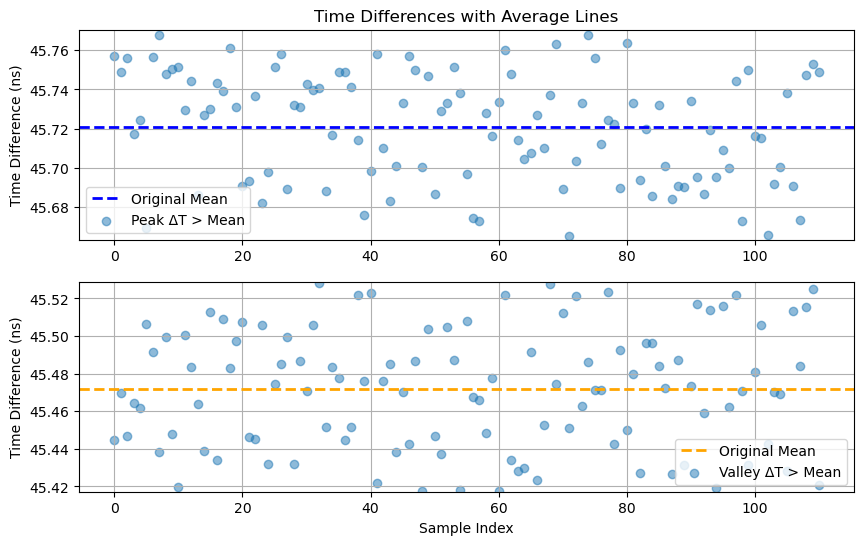

In [48]:
# 创建散点图
plt.figure(figsize=(10, 6))
# 应用新过滤方法前添加类型转换
delta_peak = abs(np.array(delta_peak)*1e9)  # 确保转换为NumPy数组
delta_valley = abs(np.array(delta_valley)*1e9)  # 确保转换为NumPy数组

# 应用新过滤方法
filtered_peak, peak_mean, upper_peak_lim, lower_peak_lim = filter_above_mean(delta_peak)
filtered_valley, valley_mean, upper_valley_lim ,lower_valley_lim= filter_above_mean(delta_valley)
print(f"Peak Mean: {peak_mean:.2f} ns", f"Upper Limit: {upper_peak_lim:.2f} ns",f"Lower Limit: {lower_peak_lim:.2f} ns")
print(f"Valley Mean: {valley_mean:.2f} ns", f"Upper Limit: {upper_valley_lim:.2f} ns",f"Lower Limit: {lower_valley_lim:.2f} ns")

new_peak_mean = np.mean(filtered_peak)
new_valley_mean = np.mean(filtered_valley)
print(f"New Peak Mean: {new_peak_mean:.2f} ns")
print(f"New Valley Mean: {new_valley_mean:.2f} ns")
# 修改绘图部分
plt.subplot(2, 1, 1)
plt.axhline(y=new_peak_mean, color='blue', linestyle='--', linewidth=2, label='Original Mean')
plt.scatter(range(len(filtered_peak)), filtered_peak, alpha=0.5, label='Peak ΔT > Mean')
plt.ylim(lower_peak_lim, upper_peak_lim)
plt.ylabel('Time Difference (ns)')
plt.title('Time Differences with Average Lines')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.axhline(y=new_valley_mean, color='orange', linestyle='--', linewidth=2, label='Original Mean')
plt.scatter(range(len(filtered_valley)), filtered_valley, alpha=0.5, label='Valley ΔT > Mean')
plt.ylim(lower_valley_lim, upper_valley_lim)
plt.xlabel('Sample Index')
plt.ylabel('Time Difference (ns)')
plt.legend()
plt.grid(True)

plt.show()

In [57]:
# 更新统计显示（改为峰谷差平均值）
stats = []
table_data = []
def calc_nearest_diff(arr1, arr2):
    """计算arr1中每个元素与arr2中最近元素的差值"""
    diffs = []
    for t in arr1:
        if len(arr2) == 0:
            diffs.append(np.nan)
            continue
        nearest_idx = np.argmin(np.abs(arr2 - t))
        diffs.append(t - arr2[nearest_idx])
    return np.array(diffs)

# 在统计计算部分修改为：
# 计算跨通道最邻近差值
cross_peak_diffs = calc_nearest_diff(smooth_time1.values[cross_RISE_points1], smooth_time2.values[cross_RISE_points2])
valid_peak_diffs = cross_peak_diffs[~np.isnan(cross_peak_diffs)]*1e9

cross_valley_diffs = calc_nearest_diff(smooth_time1.values[cross_FALL_points1], smooth_time2.values[cross_FALL_points2]) 
valid_valley_diffs = cross_valley_diffs[~np.isnan(cross_valley_diffs)]*1e9

# 修正平均值计算并添加异常值过滤
def filter_outliers(data):
    if len(data) == 0:
        return data, np.nan, np.nan
    mean_val = np.mean(data)
    std_val = np.std(data)
    # 保留 [mean - std, mean + std] 范围内的数据
    lower_bound = mean_val - std_val
    upper_bound = mean_val + std_val
    filtered = data[(data >= lower_bound) & (data <= upper_bound)]
    return filtered, mean_val, (lower_bound, upper_bound)

# 应用过滤
filtered_peaks, peak_avg, (peak_low, peak_high) = filter_outliers(valid_peak_diffs)
filtered_valleys, valley_avg, (valley_low, valley_high) = filter_outliers(valid_valley_diffs)

# 新增打印过滤后的均值
print(f"New Filtered Peak Mean: {np.mean(filtered_peaks):.2f} ns" if len(filtered_peaks) > 0 else "No valid peaks")
print(f"New Filtered Valley Mean: {np.mean(filtered_valleys):.2f} ns" if len(filtered_valleys) > 0 else "No valid valleys")

filter_sum_mean = (np.mean(filtered_peaks)+np.mean(filtered_valleys))/2
print(f"New Filtered Sum Mean: {filter_sum_mean:.2f} ns")

# 更新到DataFrame
diff_data = []
for diff in filtered_peaks:
    diff_data.append({'Type': 'Peak', 'Status': 'Peak', 'Value (ns)': diff})
for diff in filtered_valleys:
    diff_data.append({'Type': 'Peak', 'Status': 'Valley', 'Value (ns)': diff})
# 重复相同处理逻辑给valley...

# 生成DataFrame
df = pd.DataFrame(diff_data)

# 保留原有统计信息（可选）
stats_df = pd.DataFrame(
    table_data,
    columns=['Channel', 'Peak Count', 'Avg Peak Interval', 'Avg Valley Interval']
)



New Filtered Peak Mean: -46.00 ns
New Filtered Valley Mean: -44.00 ns
New Filtered Sum Mean: -45.00 ns


In [58]:
df

,Type,Status,Value (ns)
0,Peak,Peak,-46.0
1,Peak,Peak,-46.0
2,Peak,Peak,-46.0
3,Peak,Peak,-46.0
4,Peak,Peak,-46.0
...,...,...,...
245,Peak,Valley,-44.0
246,Peak,Valley,-44.0
247,Peak,Valley,-44.0
248,Peak,Valley,-44.0


综合统计报告：
   Type  Status  mean           std  count   min   max
0  Peak    Peak -46.0  6.443613e-13    148 -46.0 -46.0
1  Peak  Valley -44.0  5.835867e-13    102 -44.0 -44.0


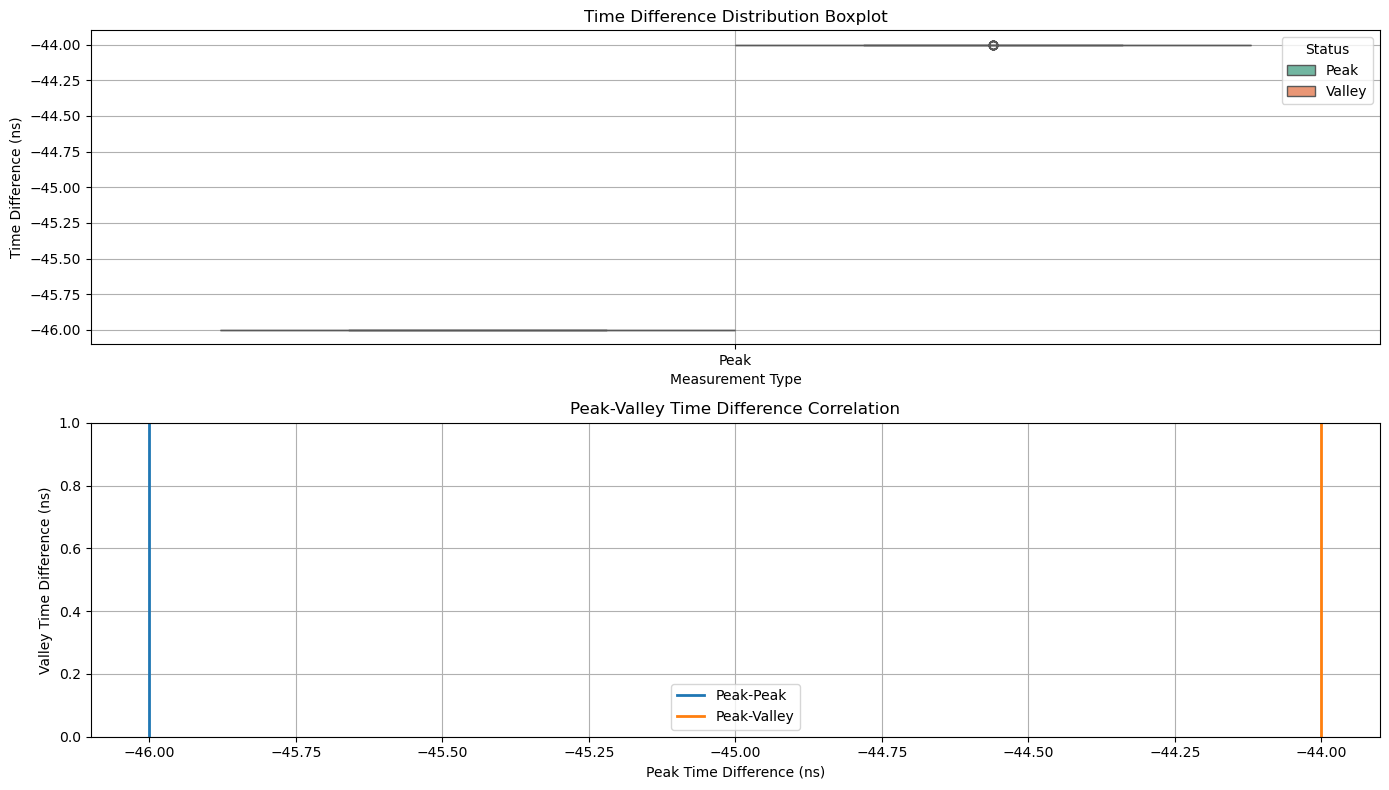

In [59]:
# 统计分析
stats = df.groupby(['Type', 'Status'])['Value (ns)'].agg(
    ['mean', 'std', 'count', 'min', 'max']
).reset_index()
print("综合统计报告：")
print(stats)

# 绘图设置
plt.figure(figsize=(14, 8))

# 绘制分布箱线图
plt.subplot(2, 1, 1)
sns.boxplot(x='Type', y='Value (ns)', hue='Status', data=df, palette='Set2')
plt.title('Time Difference Distribution Boxplot')
plt.xlabel('Measurement Type')
plt.ylabel('Time Difference (ns)')
plt.grid(True)

# 绘制累计分布图
plt.subplot(2, 1, 2)
for (t, s), group in df.groupby(['Type', 'Status']):
    sns.ecdfplot(data=group, x='Value (ns)', label=f'{t}-{s}', linewidth=2)
plt.title('Empirical Cumulative Distribution Function')
plt.xlabel('Time Difference (ns)')
plt.ylabel('Cumulative Probability')
plt.grid(True)

# 峰谷相关性分析
plt.title('Peak-Valley Time Difference Correlation')
plt.xlabel('Peak Time Difference (ns)')
plt.ylabel('Valley Time Difference (ns)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# 附加统计：峰谷差对比
if {'Peak', 'Valley'}.issubset(df['Type'].unique()):
    peak_vals = df[df['Type'].eq('Peak') & df['Status'].eq('Normal')]['Value (ns)']
    valley_vals = df[df['Type'].eq('Valley') & df['Status'].eq('Normal')]['Value (ns)']
    
    plt.figure(figsize=(10, 5))
    plt.scatter(peak_vals, valley_vals[:len(peak_vals)], alpha=0.6)
    plt.plot([peak_vals.min(), peak_vals.max()], 
             [peak_vals.min(), peak_vals.max()], 'r--')
    plt.title('峰谷时间差相关性分析')
    plt.xlabel('Peak 时间差 (ns)')
    plt.ylabel('Valley 时间差 (ns)')
    plt.grid(True)
    plt.show()
